# Multi-layer Perceptron

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

c:\Users\Hasnain\miniconda3\envs\tnf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 9.2572 - mae: 2.6499
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 6.6323 - mae: 2.1376 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 4.4921 - mae: 1.6572
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4063 - mae: 1.3342
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.6188 - mae: 1.1941 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.3188 - mae: 1.1210 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1.5999 - mae: 0.9718 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.4880 - mae: 0.9465 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.4195 - mae: 0.9087 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.2464 - mae: 0.8714 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3268 - mae: 0.8892 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2301 - mae: 0.8507 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0

c:\Users\Hasnain\miniconda3\envs\tnf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


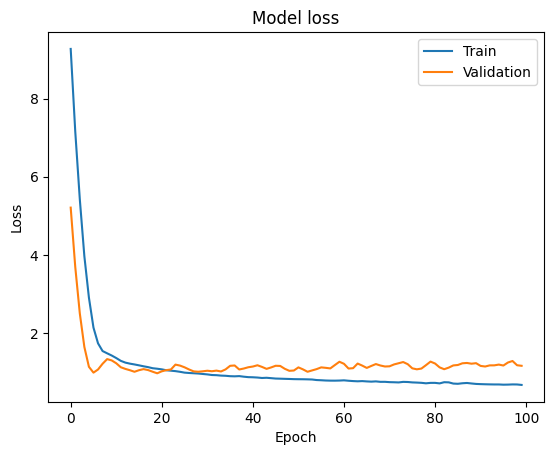

In [4]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Assignment: what is a Validation Set? or validation loss?

A **validation set** is a subset of data not used in training but used to evaluate the model during training. It helps track the model’s performance on unseen data. The **validation loss** is the error calculated on the validation set after each training epoch.\
 It reflects how well the model is generalizing to data it hasn’t seen before. If the validation loss is high or increases, it could indicate overfitting. Overfitting occurs when the model learns patterns specific to the training data, not generalizable to new data. A decreasing validation loss shows that the model is improving. The validation set helps tune hyperparameters and prevent overfitting by providing early feedback during training.

----

### Early Stopping of Epochs

c:\Users\Hasnain\miniconda3\envs\tnf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 11.6669 - val_loss: 7.2946
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.6254 - val_loss: 5.6115
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.7202 - val_loss: 4.0757
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.9812 - val_loss: 2.6716
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4.6691 - val_loss: 1.5728
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.8893 - val_loss: 0.9680
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.0104 - val_loss: 0.8040
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.6154 - val_loss: 0.9097
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4934 - val_loss: 0.9652
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.2899 - val_loss: 1.0217
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.3815 - val_loss: 0.9954
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 1.4042 - val_

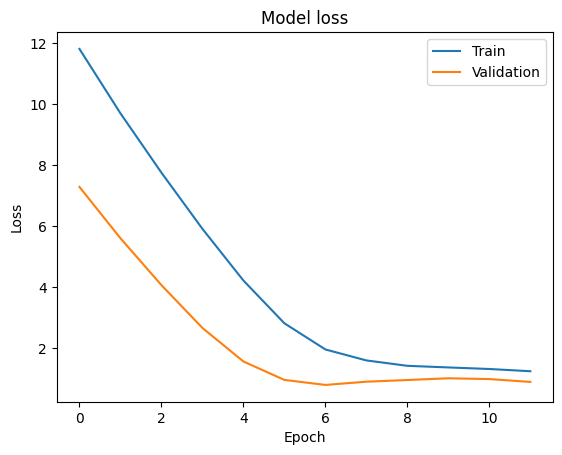

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()